# hi

- 15개 카테고리 100개씩 학습
  - 오트밀 쿠키, 초코 파운드 케익, 모닝빵, ,비건 김치, 펠리체티 유기농 스파게티, 야채 라면,
베지 샌드위치 서브웨이, 쌀국수, 통곡물 블랙, 푸레이크, 크로와상, 호두 , 찐빵, 회덮밥, 오징어덮밥, 새우초밥

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (48.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
%cd drive/My Drive

/content/drive/My Drive


In [ ]:
# !git clone https://github.com/ultralytics/yolov3.git

Cloning into 'yolov3'...
remote: Enumerating objects: 9413, done.
remote: Total 9413 (delta 0), reused 0 (delta 0), pack-reused 9413
Receiving objects: 100% (9413/9413), 7.80 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (6458/6458), done.


In [3]:
%cd yolov3

/content/drive/My Drive/yolov3


# Training


In [13]:
# !python3 train.py --cfg cfg/yolov3-spp3.cfg --data data/custom.data --weights cfg/darknet53.conv.74 --batch-size 4
!python3 train.py --cfg cfg/yolov3-spp3.cfg --data data/custom.data --weights weights/last.pt --batch-size 4

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Your branch is behind 'origin/master' by 3 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp3.cfg', data='data/custom.data', device='', epochs=300, evolve=False, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-08-15 09:53:47.609868: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.39267e+07 parameters, 6.39267e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
Caching labels data/custo

In [50]:
!python3 test.py --cfg cfg/yolov3-spp3.cfg --data data/test.data --weights weights/best.pt --batch-size 4 

Namespace(augment=False, batch_size=4, cfg='cfg/yolov3-spp3.cfg', conf_thres=0.001, data='data/test.data', device='', img_size=512, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.39267e+07 parameters, 6.39267e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.38999e+07 parameters, 6.38999e+07 gradients
Caching labels data/custom/labels.npy (226 found, 16 missing, 0 empty, 0 duplicate, for 242 images): 100% 242/242 [00:00<00:00, 1070.46it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1:   0% 0/61 [00:00<?, ?it/s]/content/drive/My Drive/yolov3/utils/utils.py:517: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  i, j 

# Metric

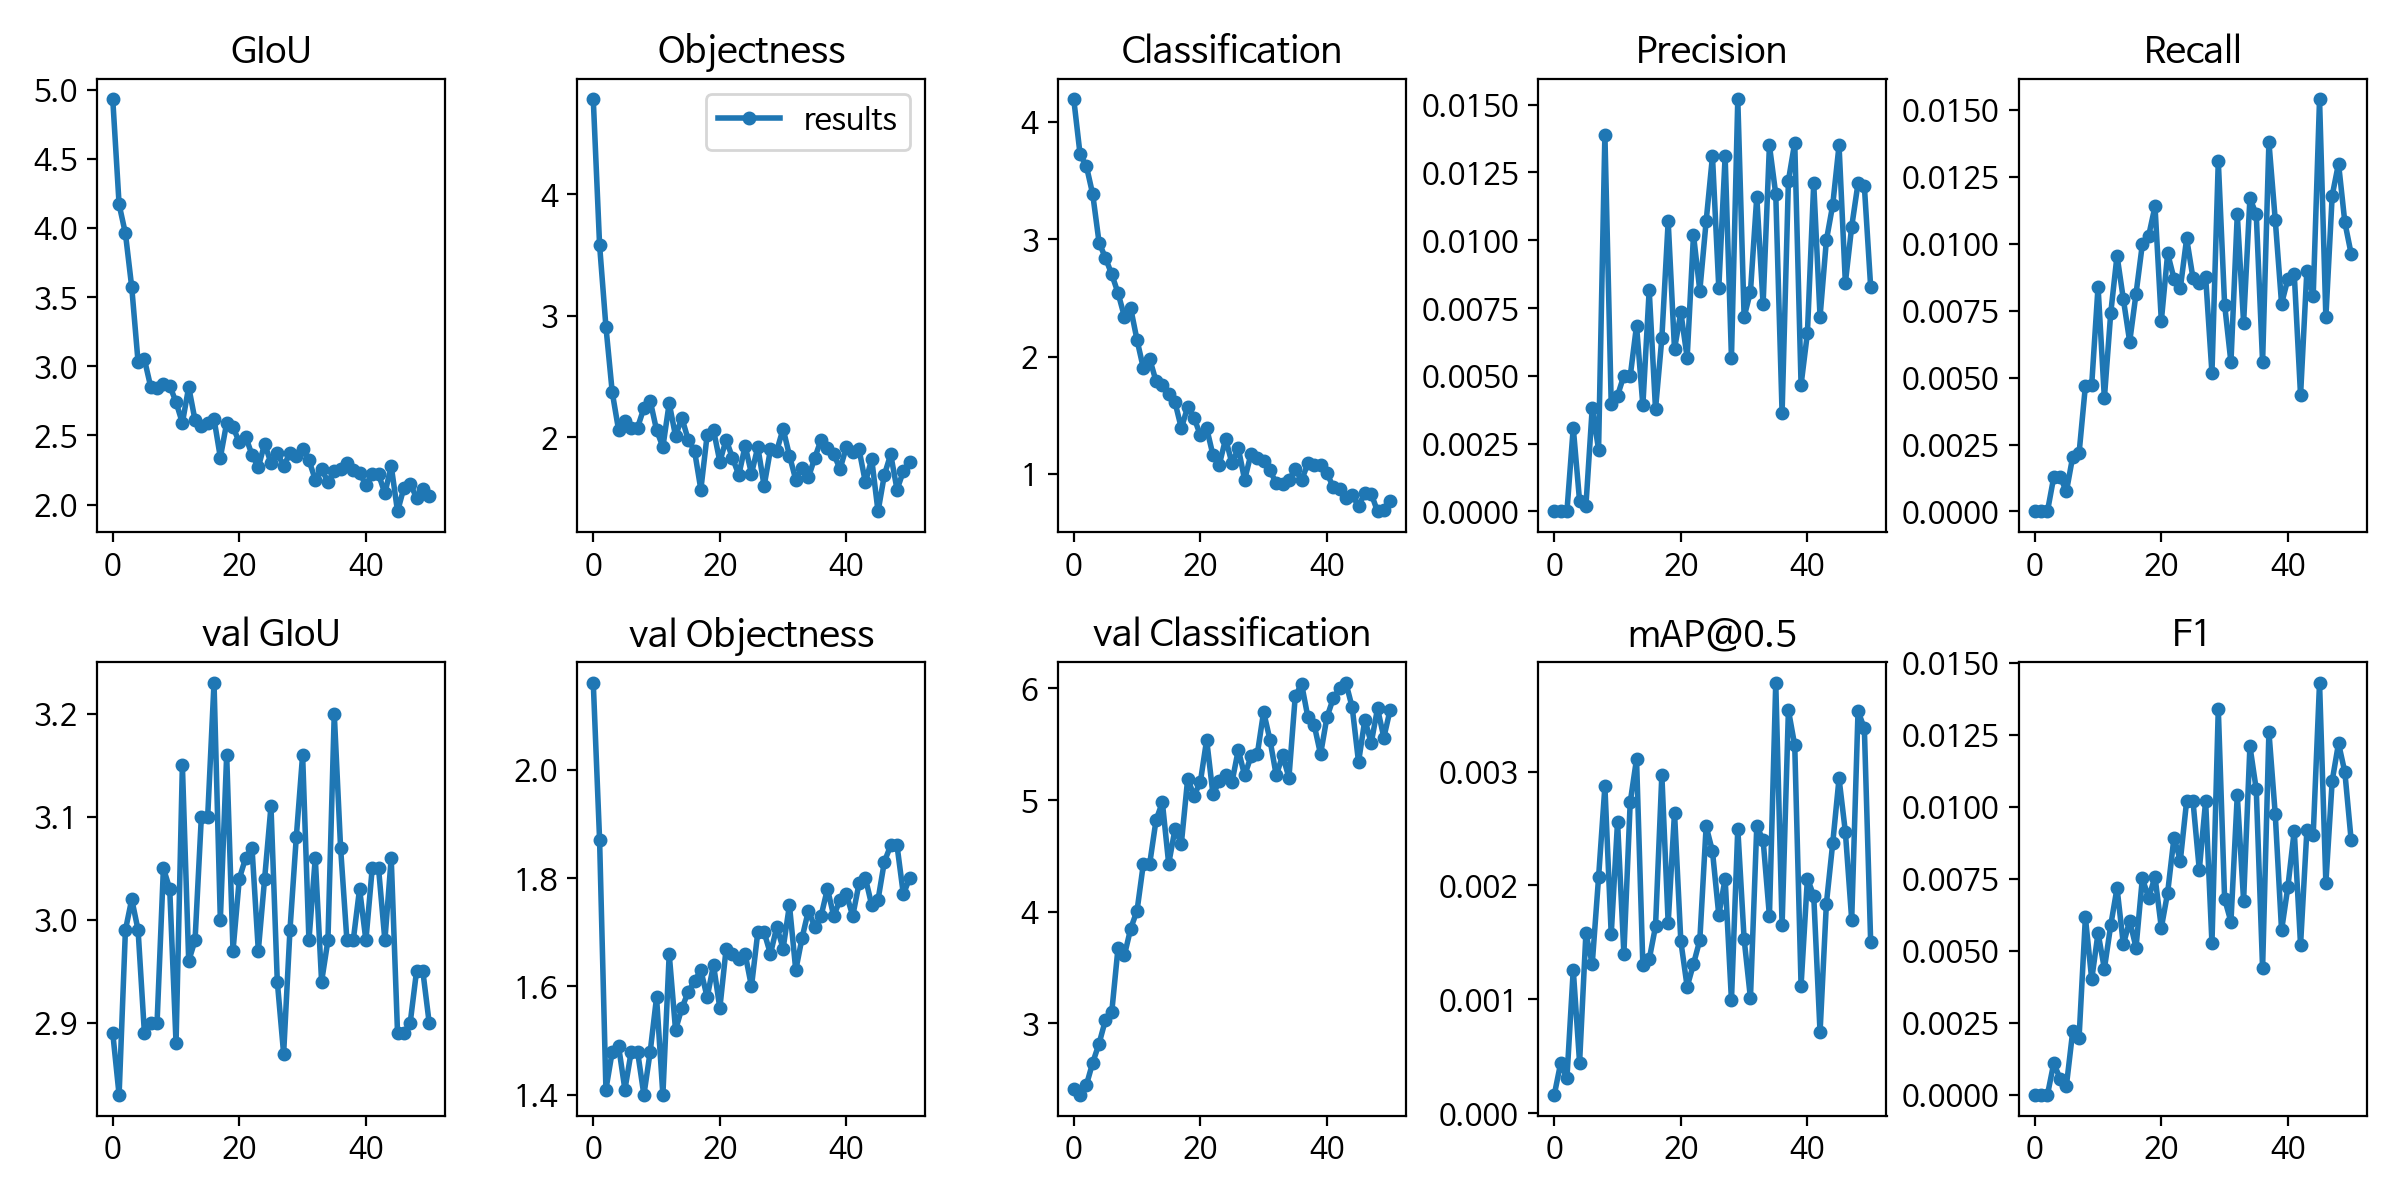

In [21]:
from PIL import Image
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image.open('results.png')

# predict



In [67]:
!python3 detect.py --cfg cfg/yolov3-spp3.cfg --names data/custom/classes.names --weights weights/best.pt --source data/samples/새우초밥6.jpg

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp3.cfg', classes=None, conf_thres=0.3, db='data/food_label.db', device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/custom/classes.names', output='output', save_txt=False, source='data/samples/새우초밥6.jpg', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.39267e+07 parameters, 6.39267e+07 gradients
image 1/1 data/samples/새우초밥6.jpg: 320x512 1 새우초밥s, Done. (0.033s)
+----+--------------+----------+------------+--------+--------+-----------+--------+-----------+--------+-------------+----------------+
|    | FOOD_LABEL   |   단백질 |   탄수화물 |   지방 |   철분 | 오메가3   |   칼슘 | 비타민D   | 아연   |   비타민B12 | 필수아미노산   |
|----+--------------+----------+------------+--------+--------+-----------+--------+-----------+--------+-------------+----------------|
|  0 | 새우초밥     |    16804 |      78422 |    752 |  0.275 | -

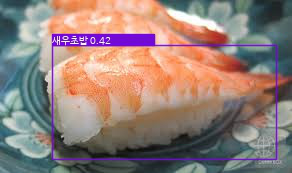

In [68]:
from PIL import Image
Image.open('output/새우초밥6.jpg')

# 앞으로 할일

- 많은 데이터 수집(최소 3만 개 이상)
- yolo model 공부하기
- 성능 지표 정하기, model selection 과정
- 적용할 시스템 구성